# Question
Implement A star search algorithm which can be used to find the optimal path between two nodes in a graph.

(You can take start state as A and goal state J. The values on the edges indicate the cost of traversing the edge. The values beside the nodes represent its heuristic estimate)

Diagram:


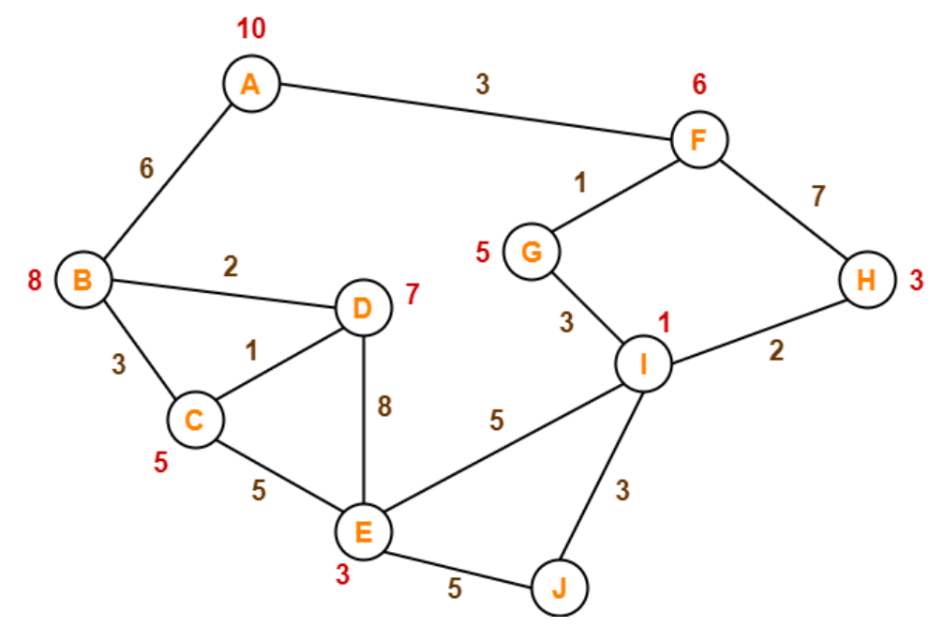

In [ ]:
# creating adjacency matrix

adjacency_list = {
    'A': [('B',6), ('F',3)],
    'B': [('A',6), ('C',3), ('D',2)],
    'C': [('B',3), ('E',3), ('D',1)],
    'D': [('B',2), ('C',1), ('E',8)],
    'E': [('C',5), ('D',8), ('I',5),('J',5)],
    'F': [('A',3), ('G',1), ('H',7)],
    'G': [('F',1), ('I',2)],
    'H': [('F',7), ('I',2)],
    'I': [('G',3), ('H',2), ('E',5), ('J',3)],
    'J': [('E',5), ('I',3)]
}

In [ ]:
# function to get the cost of moving to neighbour snd neighbour

def get_neighbour(v):
  return adjacency_list[v]

In [ ]:
# function to return heuristic cost of each node to end node
def heuristic_function(n):
  H = {'A': 10,
       'B': 8,
       'C': 5,
       'D': 7,
       'E': 3,
       'F': 6,
       'G': 5,
       'H': 3,
       'I': 1,
       'J': 0
       }
  return H[n]

In [ ]:
# function for A star algorithm
def a_star_algo(start_node, stop_node):

  open_list = set([start_node])
  closed_list = set([])

  g = {}

  g[start_node]= 0

  parents = {}
  parents[start_node] = start_node

  while len(open_list) > 0:
    n = None

    for v in open_list:
      if n == None or g[v] + heuristic_function(v) < g[n] + heuristic_function(n):
        n = v

    if n == None:
      print('Path does not exist')
      return None

    if n == stop_node:
      reconst_path = []

      while parents[n] != n:
        reconst_path.append(n)
        n = parents[n]

      reconst_path.reverse()

      print('Path found: {}'.format(reconst_path))
      return reconst_path

    for (m, weight) in get_neighbour(n):
      if m not in open_list and m not in closed_list:
        open_list.add(m)
        parents[m] = n
        g[m] = g[n] + weight

      else:
        if g[m] > g[n] + weight:
          g[m] = g[n] + weight
          parents[m] = n

          if m in closed_list:
            closed_list.remove(m)
            open_list.add(m)

    open_list.remove(n)
    closed_list.add(n)

  print('Path does not exist!')
  return None

In [ ]:
# calling the a_start_algo to find path
a_star_algo('A', 'J')

Path found: ['F', 'G', 'I', 'J']


['F', 'G', 'I', 'J']